# IForest - IsolationForest
### The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature ###
source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.iforest

### Arguments that work with IForest algorithm:
1. n_estimators
2. max_samples
3. contamination
4. max_features
5. bootstrap
6. jobs
7. aviour
8. random_state
9. verbose

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs = O.DataHelper.get2D(N = 100, config_num=5, randomize=True, timing=True)
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True, timing=True)

get2D                    ...took   377.512226 seconds
image downsampling       ...took     5.387554 seconds
image downsampling       ...took    12.867638 seconds
image downsampling       ...took    20.326854 seconds
image downsampling       ...took    23.646708 seconds
image downsampling       ...took    32.595630 seconds
image downsampling       ...took    38.228964 seconds
image downsampling       ...took    43.566280 seconds
image downsampling       ...took    55.163264 seconds
image downsampling       ...took    83.235548 seconds
image downsampling       ...took    93.684355 seconds
image downsampling       ...took    98.484951 seconds
image downsampling       ...took   125.475538 seconds
image downsampling       ...took   130.044570 seconds
image downsampling       ...took   139.594625 seconds
image downsampling       ...took   149.665637 seconds
image downsampling       ...took   154.689706 seconds
image downsampling       ...took   159.153200 seconds
image downsampling       ...

(64, 64)


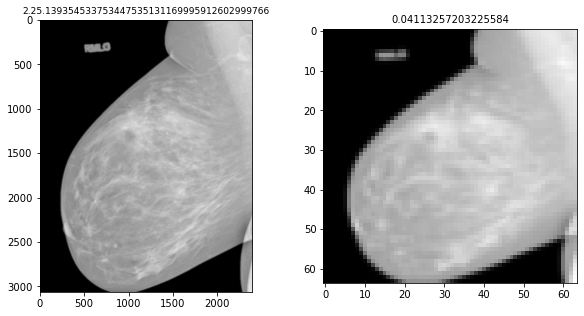

(64, 64)


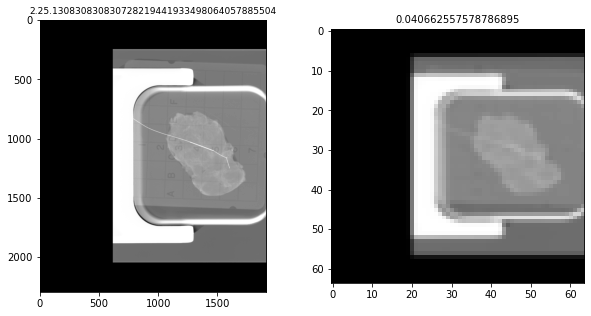

(64, 64)


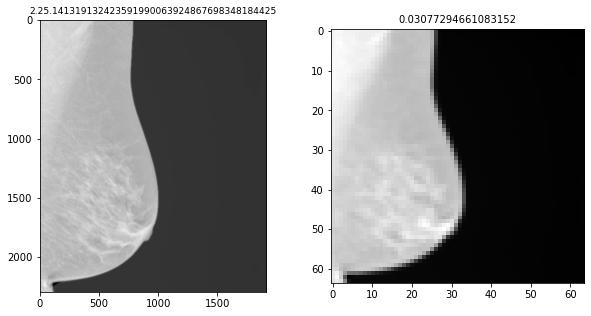

(64, 64)


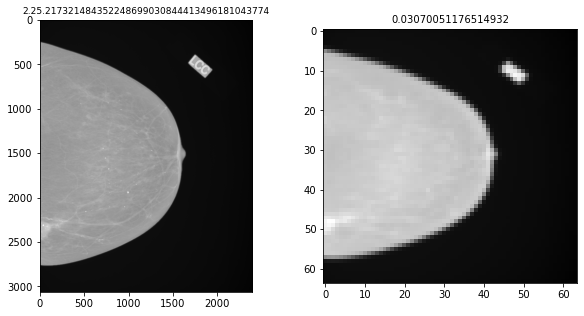

(64, 64)


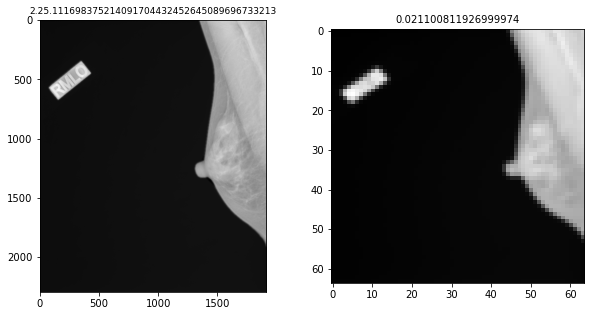

(64, 64)


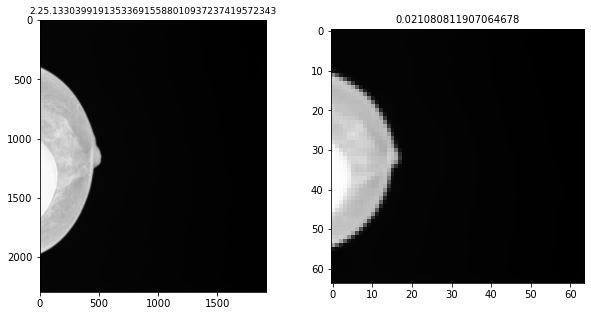

(64, 64)


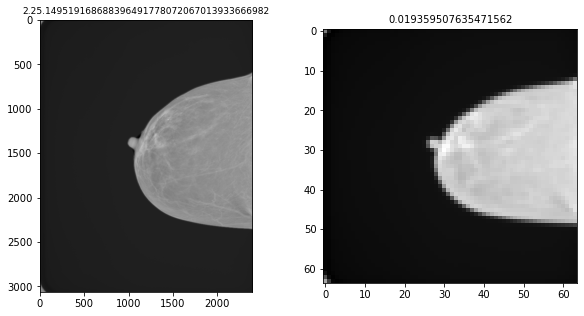

(64, 64)


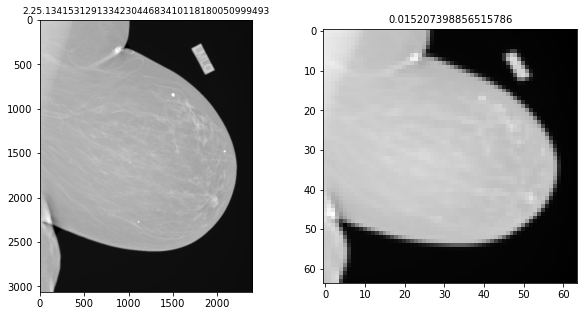

(64, 64)


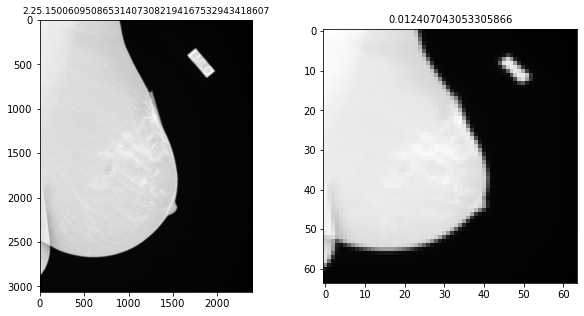

(64, 64)


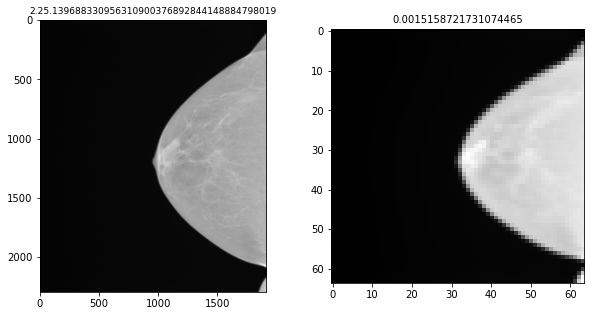

(64, 64)


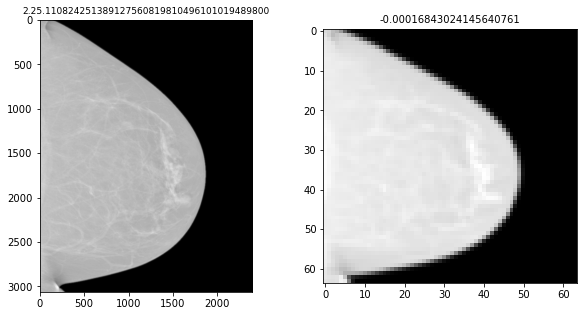

(64, 64)


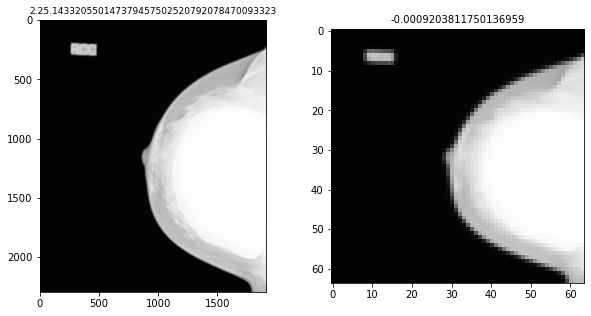

(64, 64)


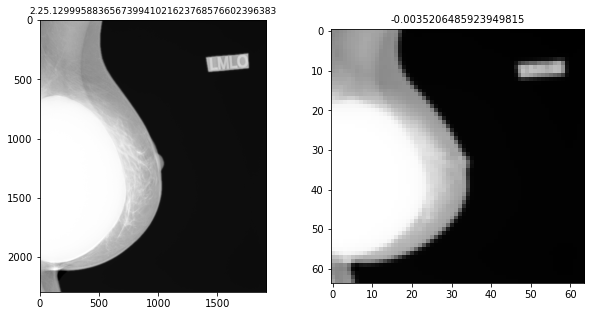

(64, 64)


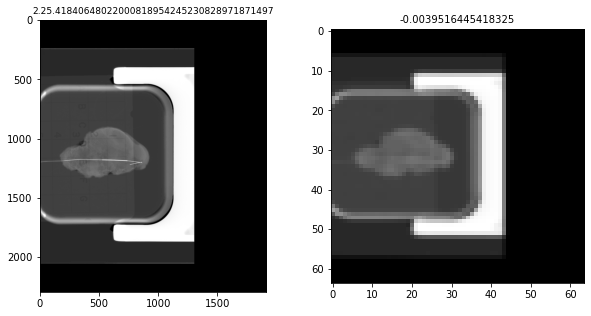

(64, 64)


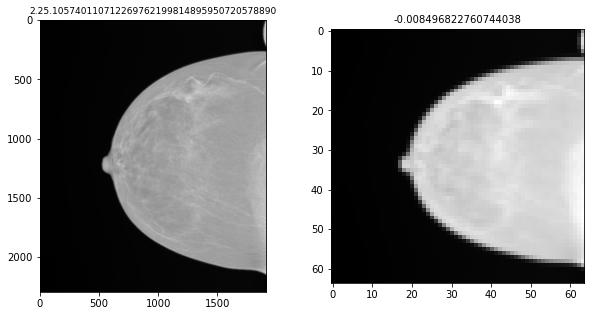

(64, 64)


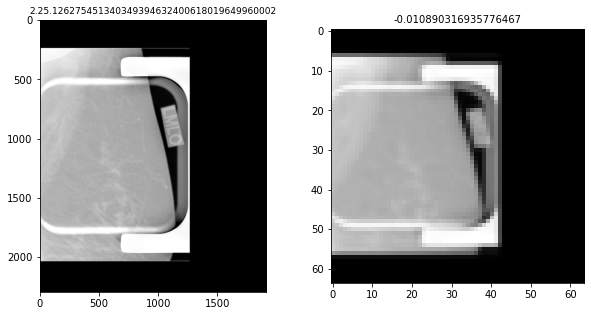

(64, 64)


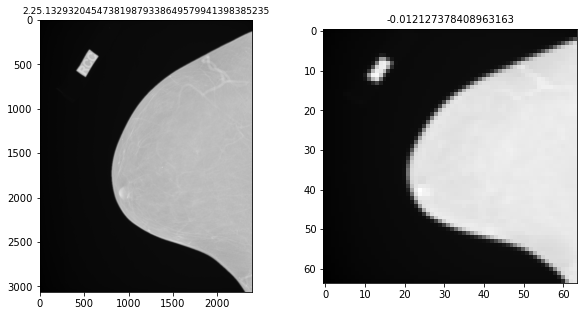

(64, 64)


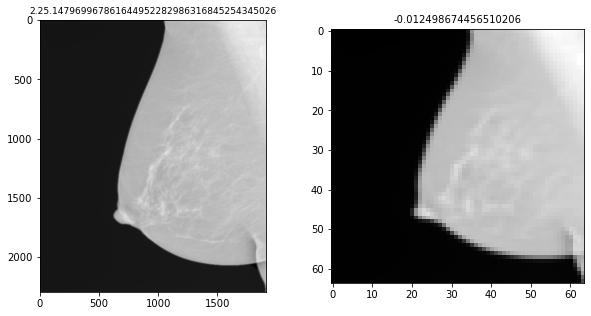

(64, 64)


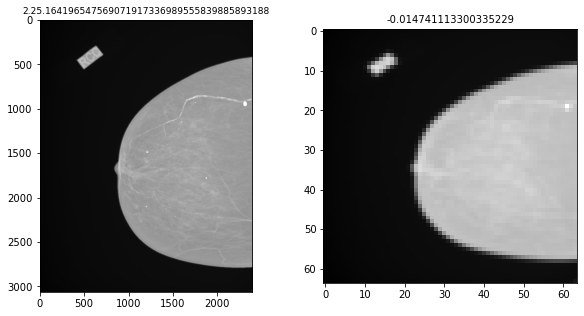

(64, 64)


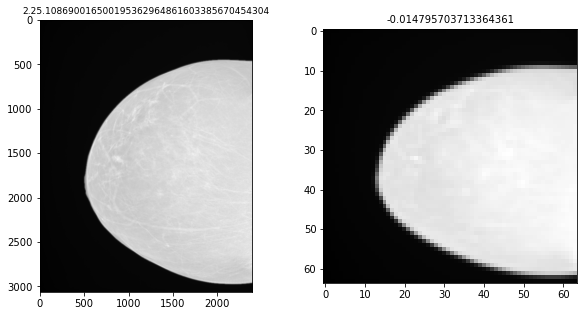

(64, 64)


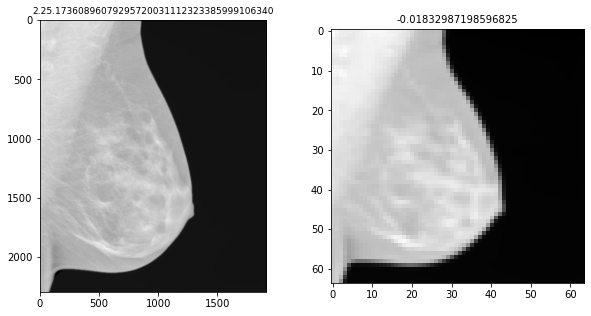

(64, 64)


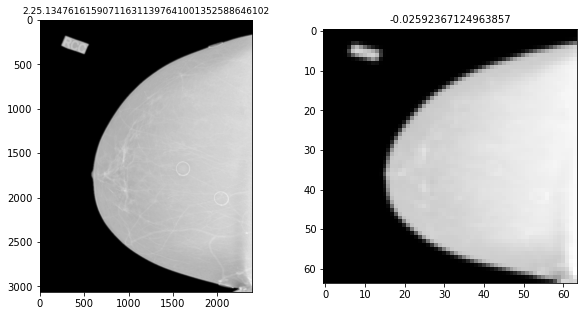

(64, 64)


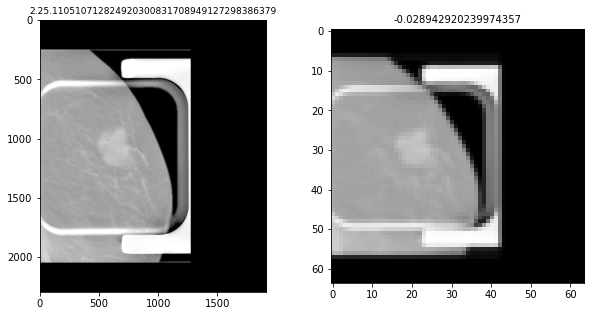

(64, 64)


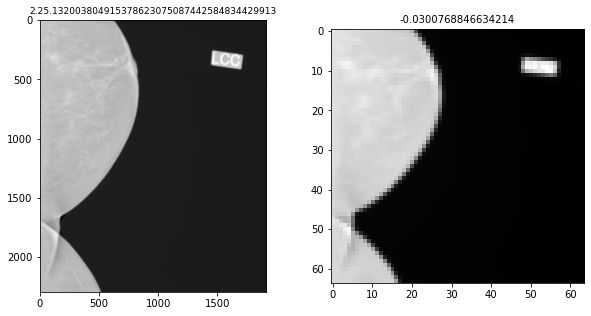

(64, 64)


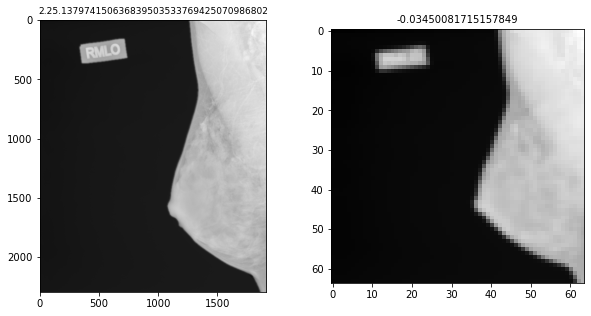

(64, 64)


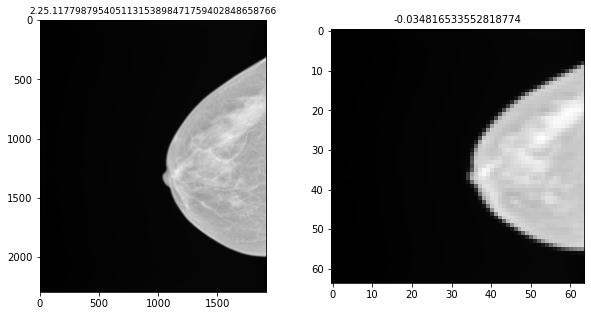

(64, 64)


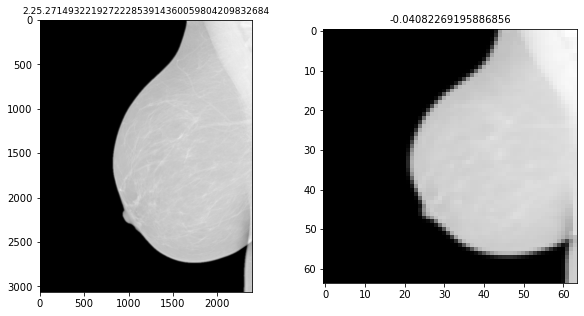

(64, 64)


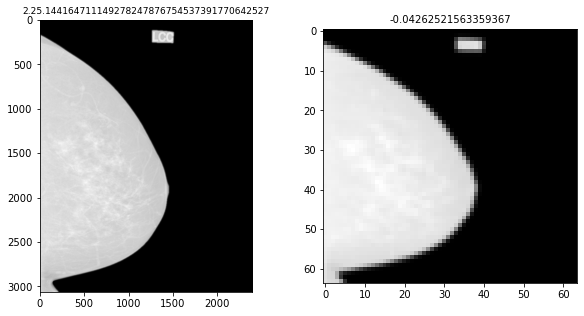

(64, 64)


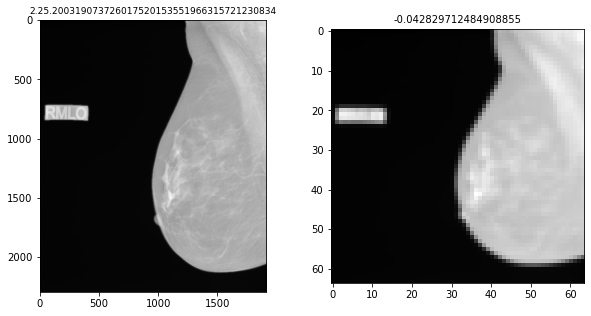

(64, 64)


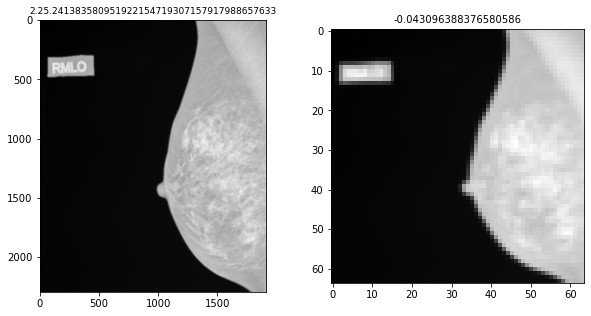

(64, 64)


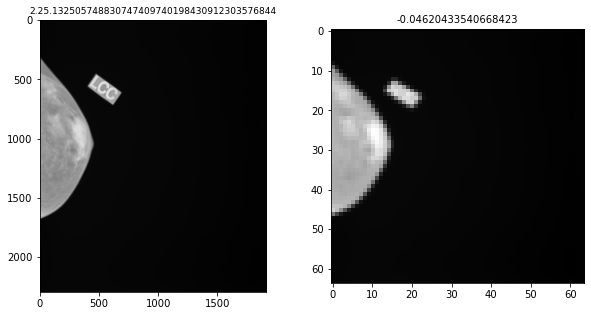

(64, 64)


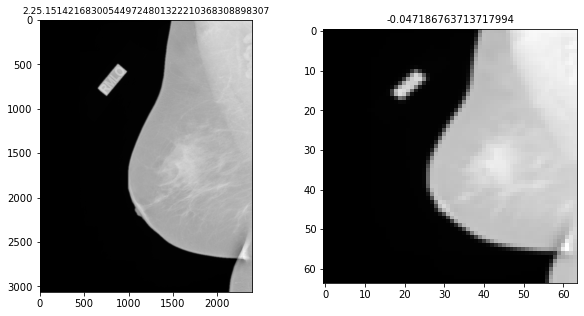

(64, 64)


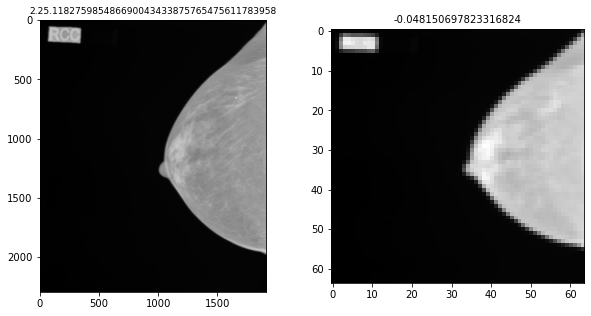

(64, 64)


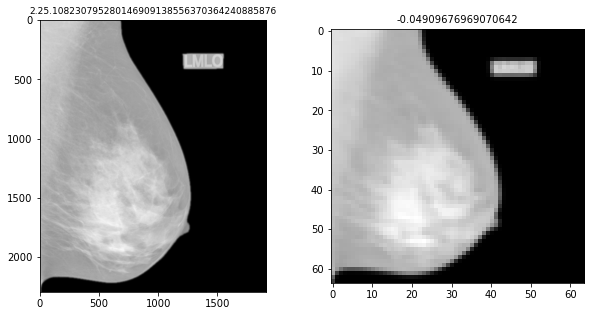

(64, 64)


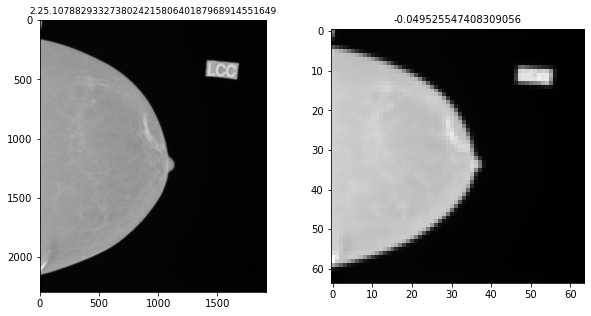

(64, 64)


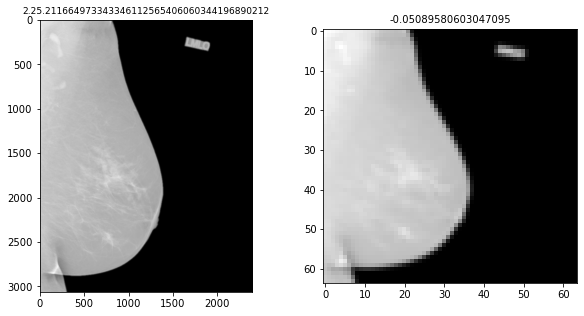

(64, 64)


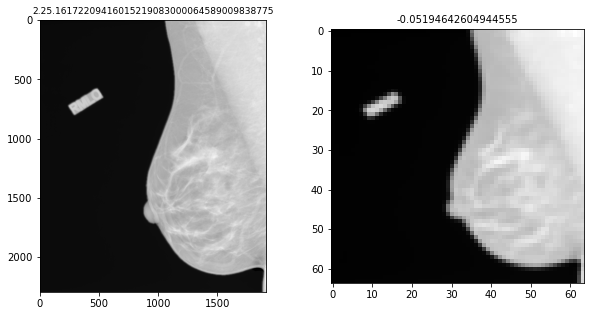

(64, 64)


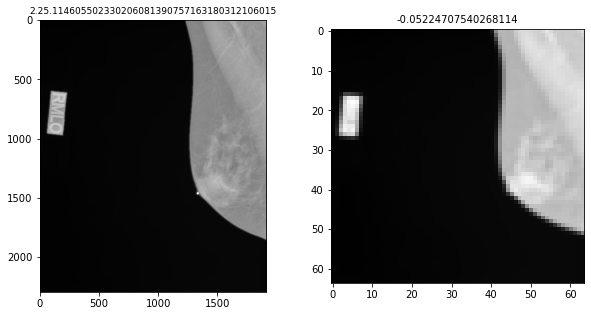

(64, 64)


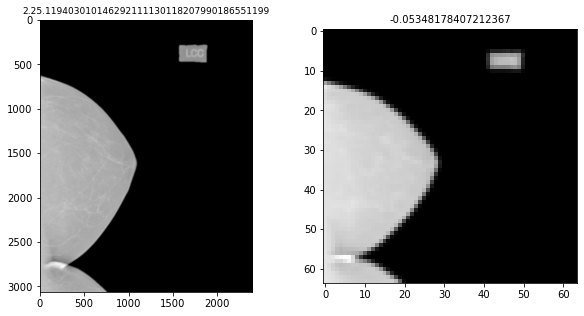

(64, 64)


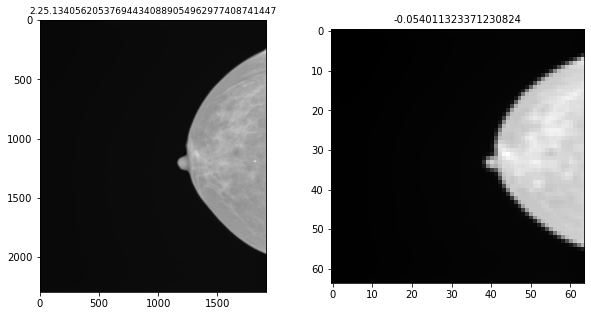

(64, 64)


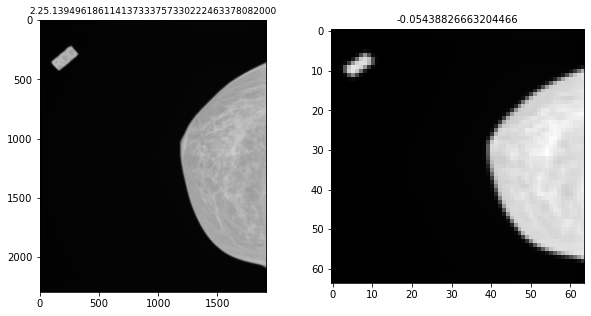

(64, 64)


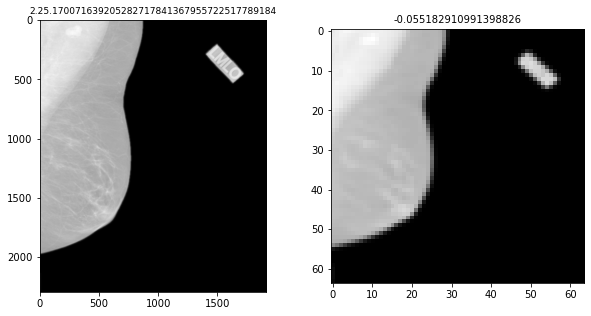

(64, 64)


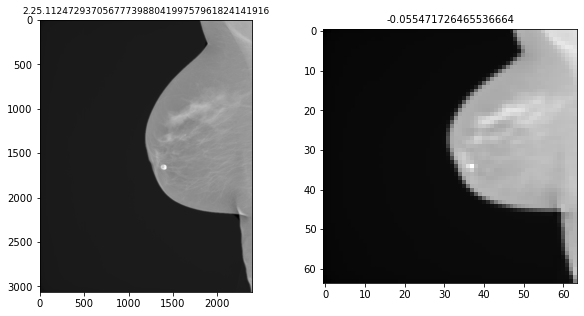

(64, 64)


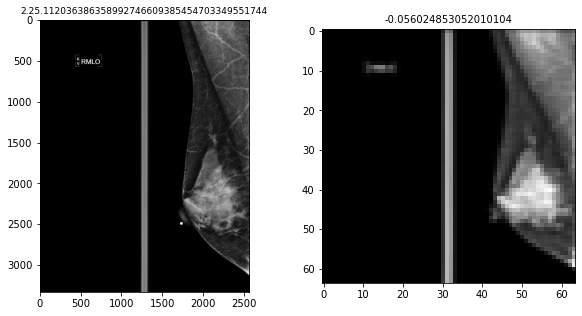

(64, 64)


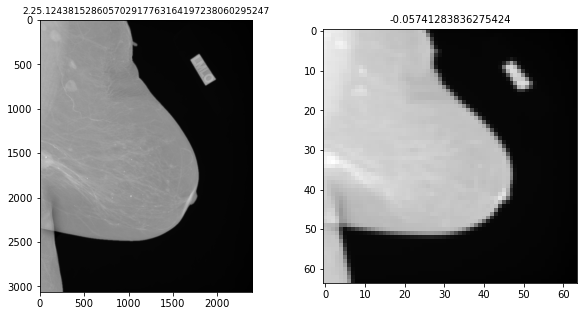

(64, 64)


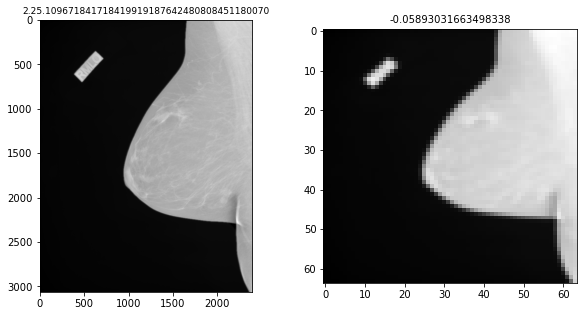

(64, 64)


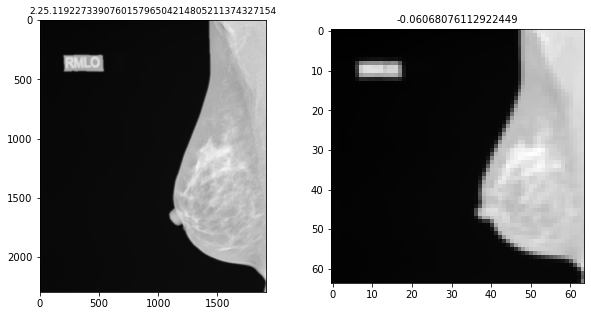

(64, 64)


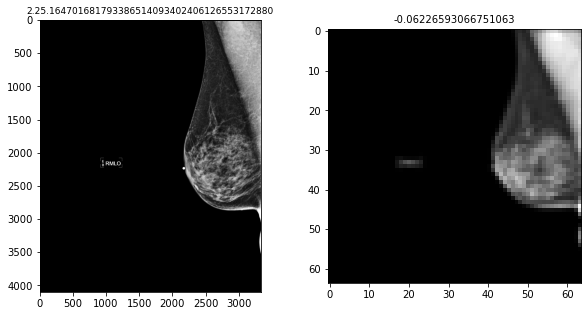

(64, 64)


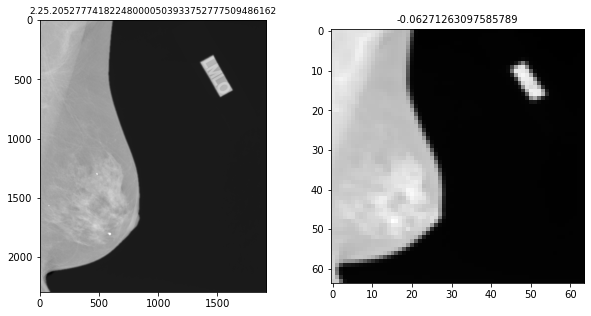

(64, 64)


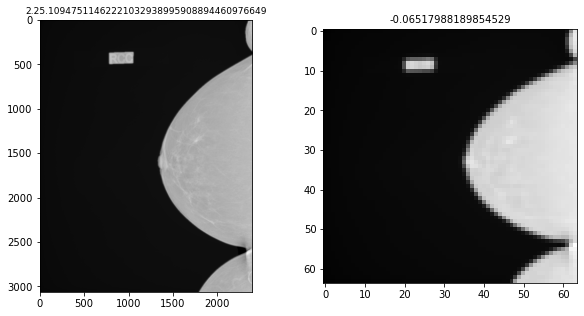

(64, 64)


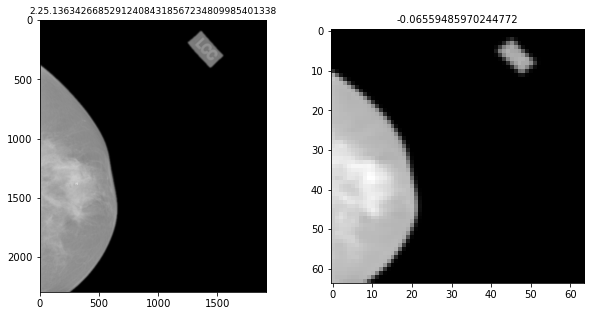

(64, 64)


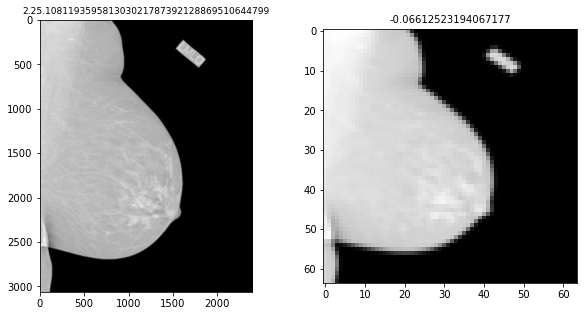

(64, 64)


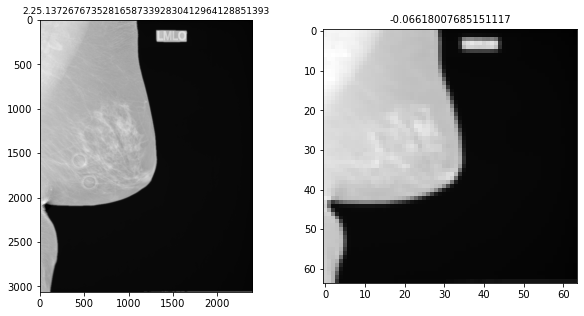

(64, 64)


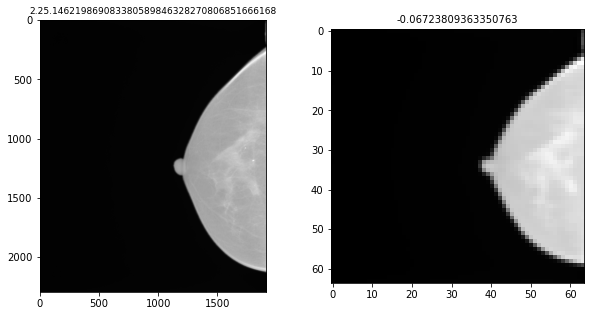

(64, 64)


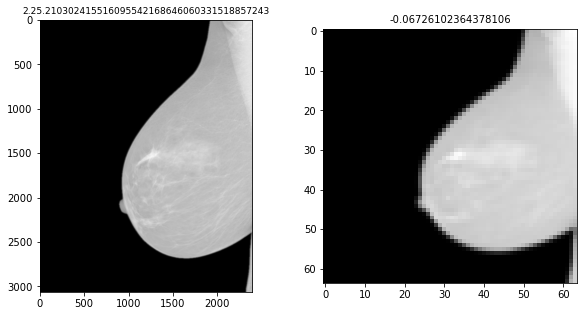

(64, 64)


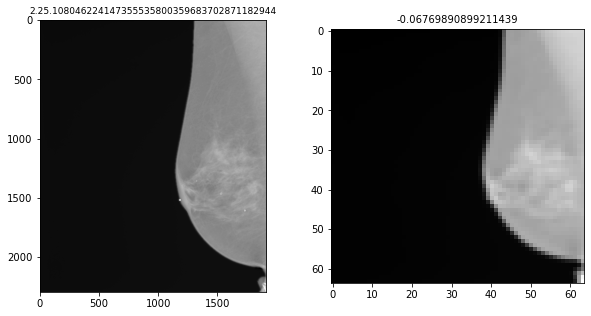

(64, 64)


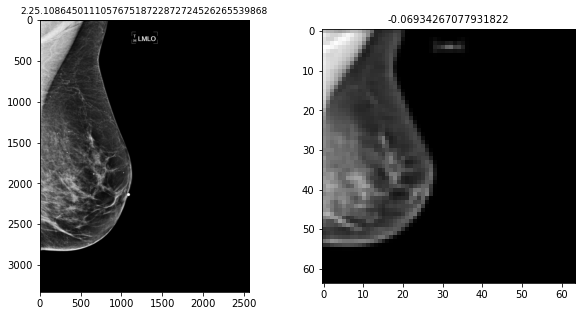

(64, 64)


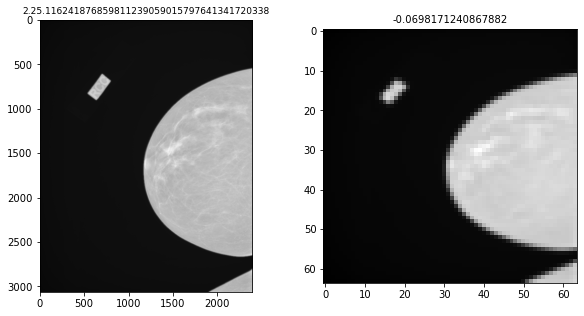

(64, 64)


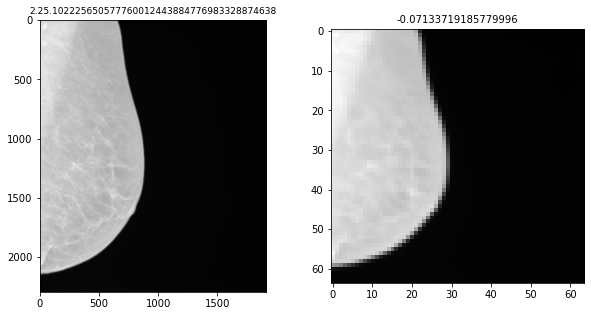

(64, 64)


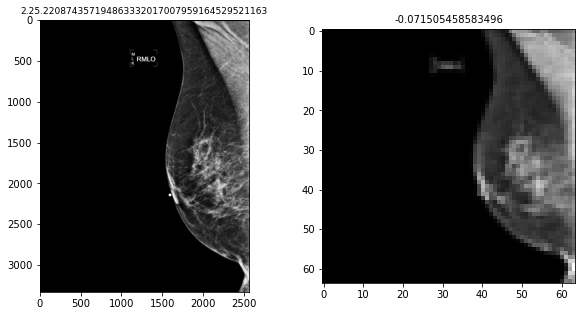

(64, 64)


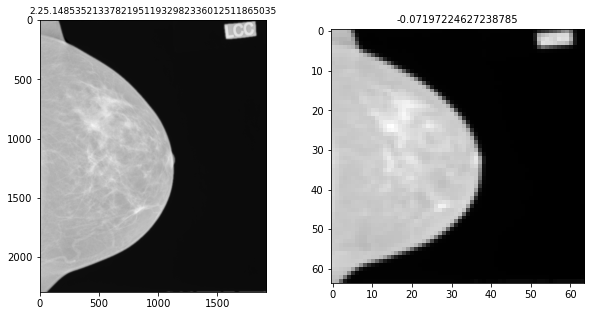

(64, 64)


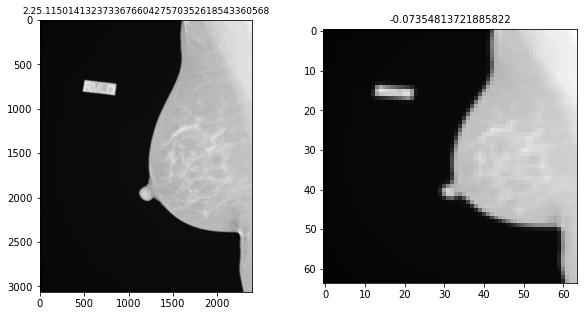

(64, 64)


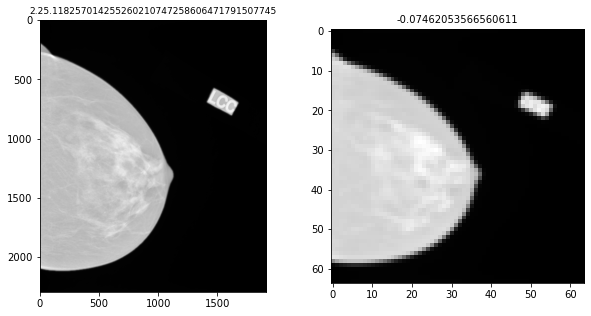

(64, 64)


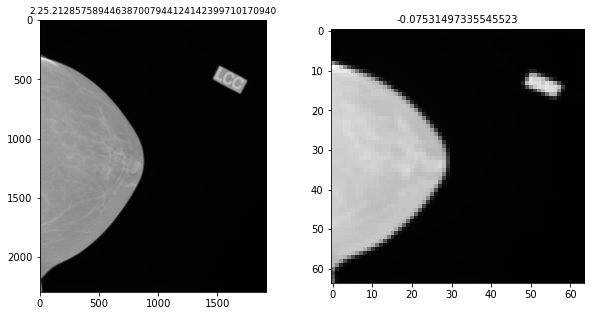

(64, 64)


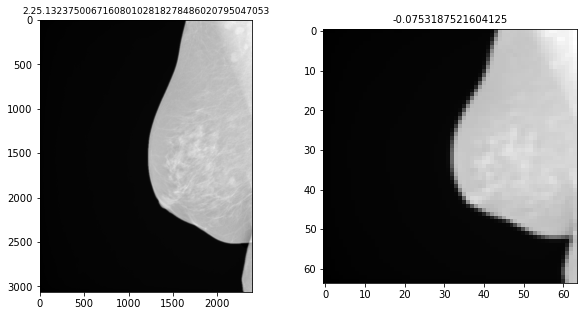

(64, 64)


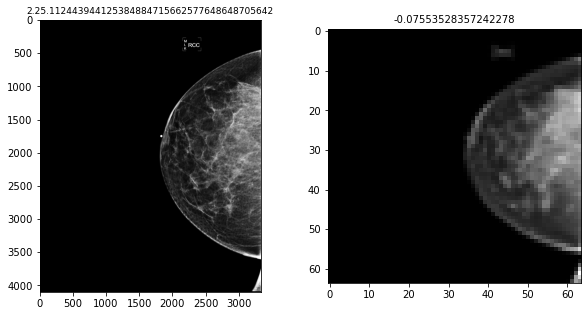

(64, 64)


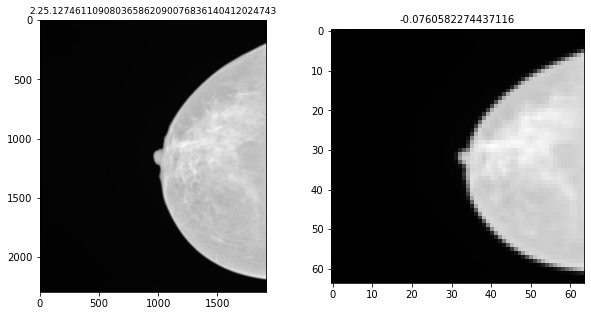

(64, 64)


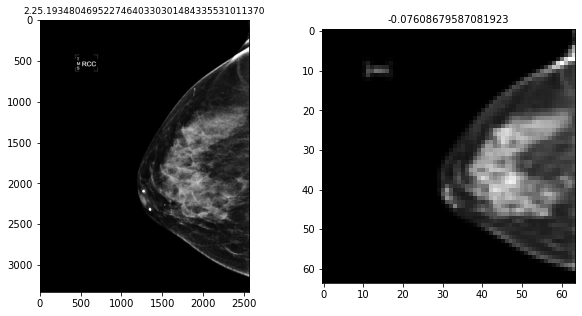

(64, 64)


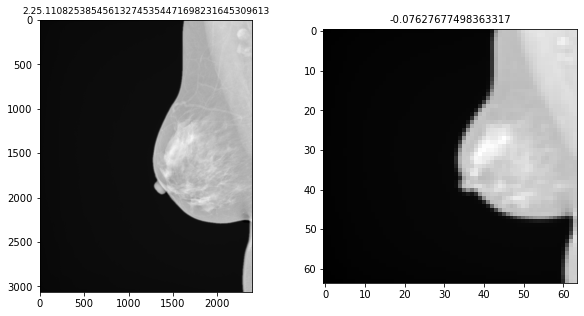

(64, 64)


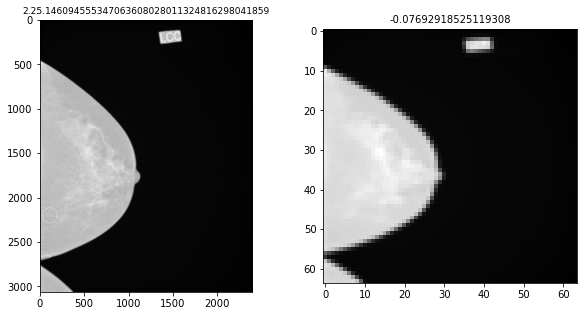

(64, 64)


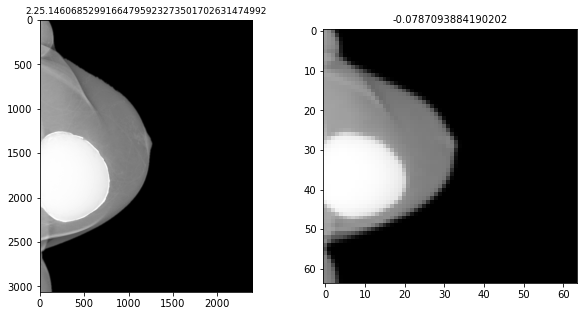

(64, 64)


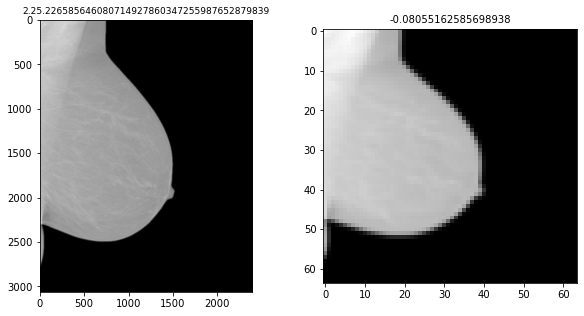

(64, 64)


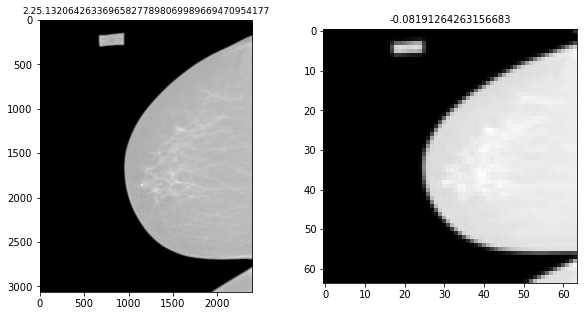

(64, 64)


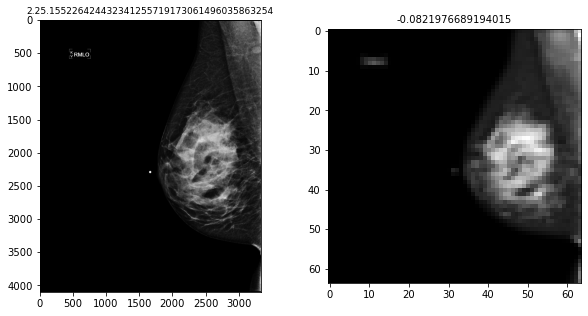

(64, 64)


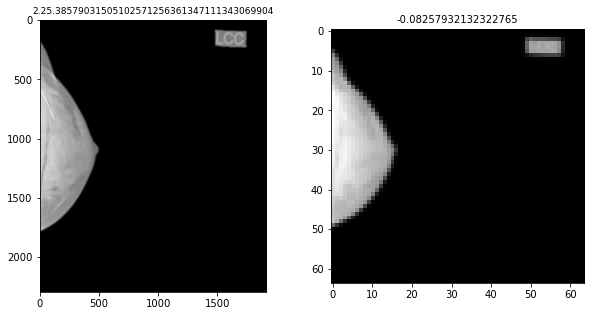

(64, 64)


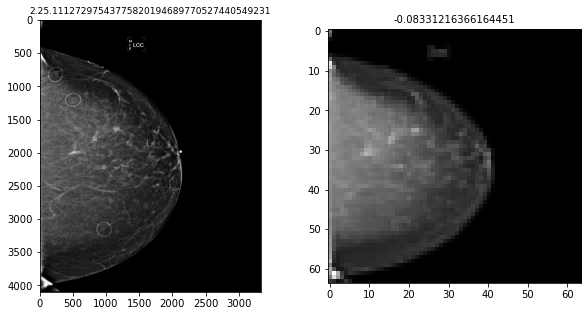

(64, 64)


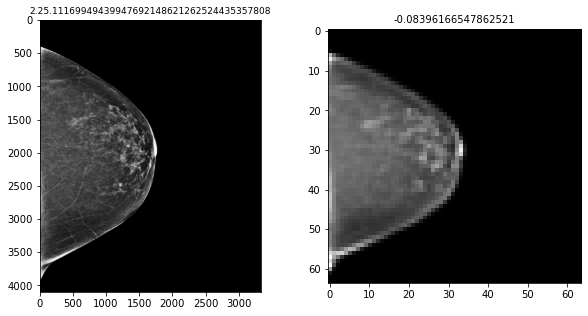

(64, 64)


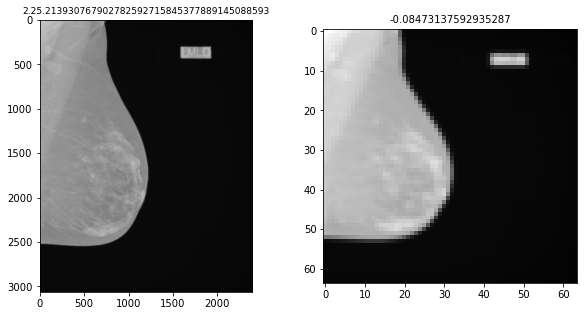

(64, 64)


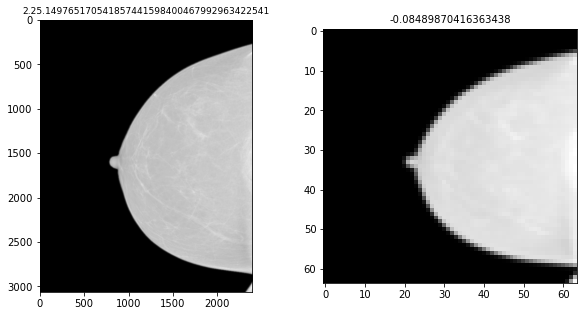

(64, 64)


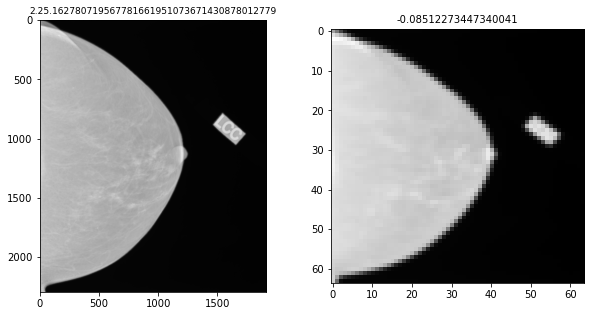

(64, 64)


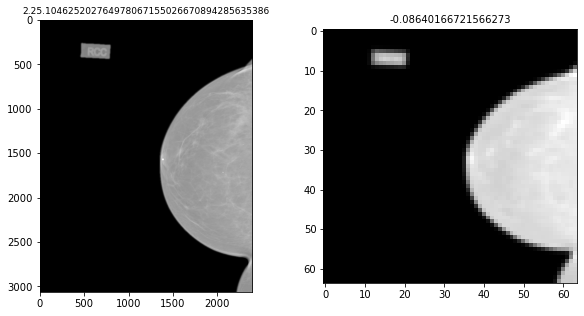

(64, 64)


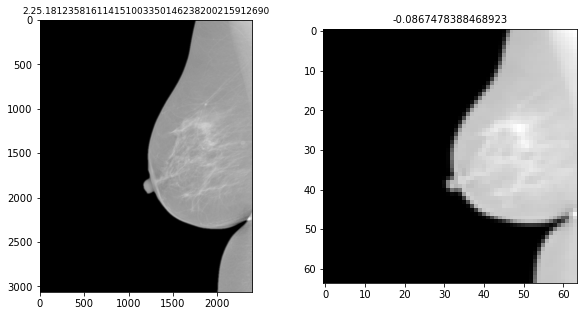

(64, 64)


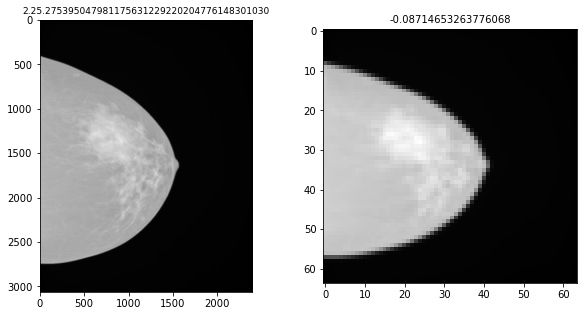

(64, 64)


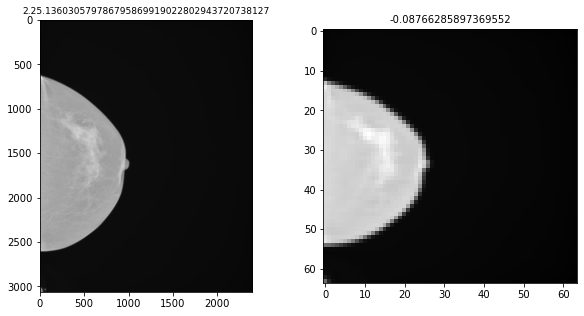

(64, 64)


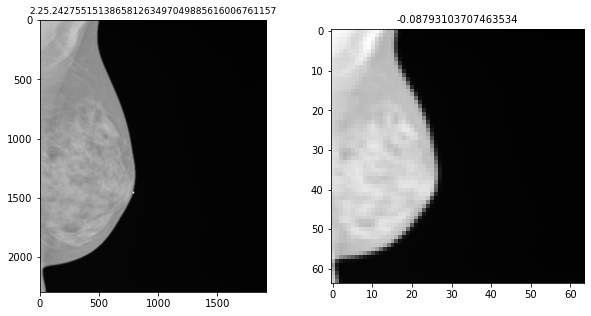

(64, 64)


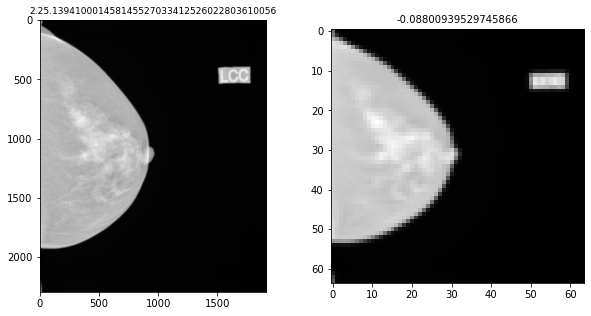

(64, 64)


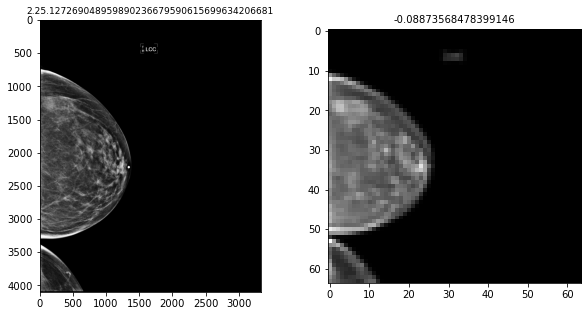

(64, 64)


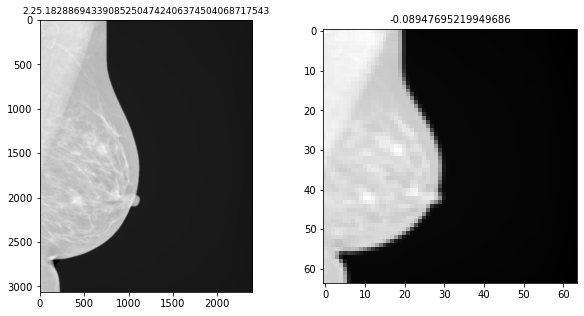

(64, 64)


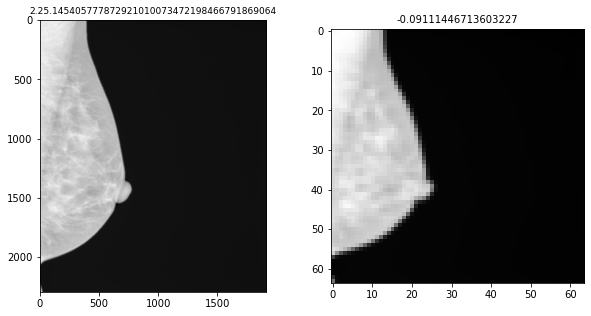

(64, 64)


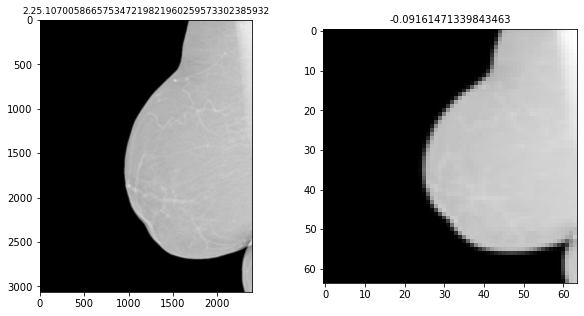

(64, 64)


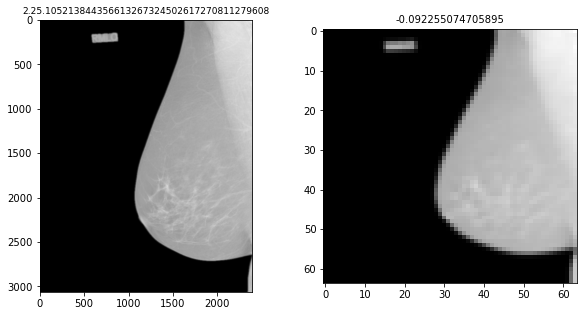

(64, 64)


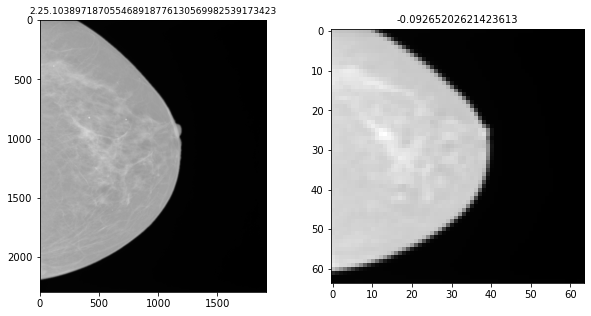

(64, 64)


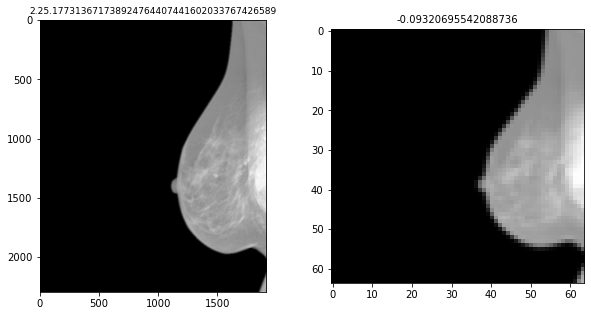

(64, 64)


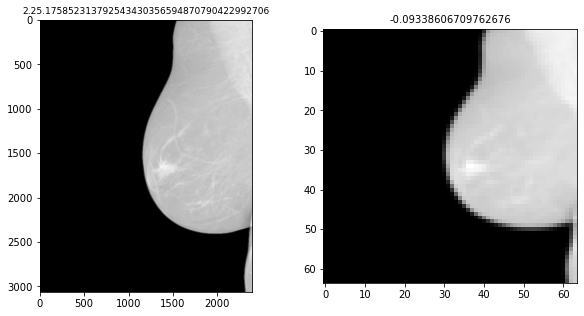

(64, 64)


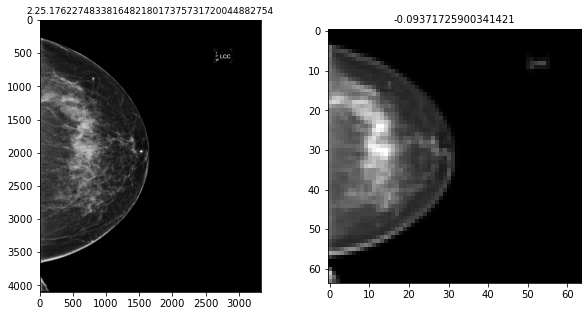

(64, 64)


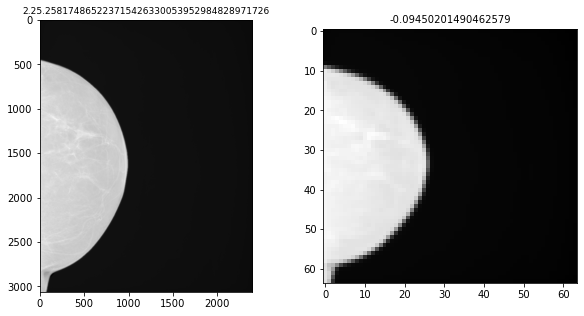

(64, 64)


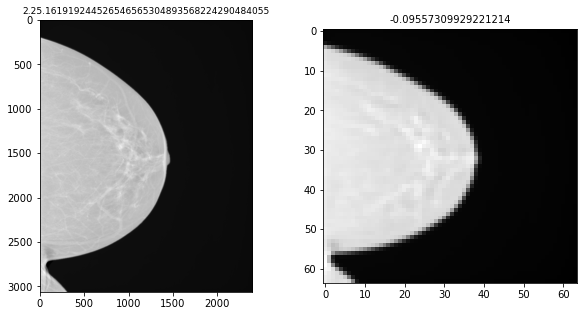

(64, 64)


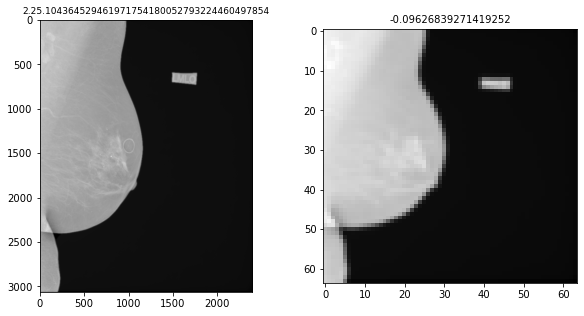

(64, 64)


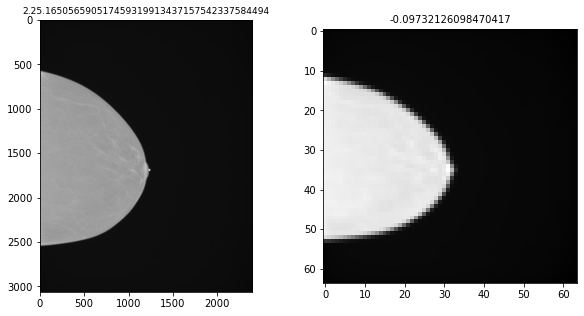

(64, 64)


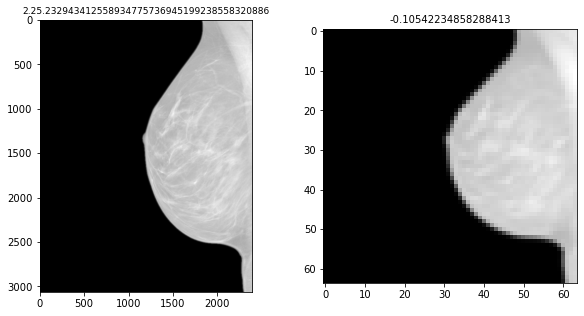

In [3]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='IForest')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])